# Plotting with Matplotlib
We can generally understand trends in data by using a plotting program to chart it. Python has a wonderful plotting library called [Matplotlib](http://matplotlib.sf.net). The IPython notebook interface we are using for these notes has that functionality built in.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np # we will explain this in the next tutorial

## Matplotlib is flexible mostly limitted by your skills

### Example Fibonacci function

As an example, we have looked at two different functions, the Fibonacci function, and the factorial function, both of which grow faster than polynomially. Which one grows the fastest? Let's plot them. First, let's generate the Fibonacci sequence of length 20:

In [2]:
def fibonacci(sequence_length):
    "Return the Fibonacci sequence of length *sequence_length*"
    sequence = [0,1]
    if sequence_length < 1:
        print("Fibonacci sequence only defined for length 1 or greater")
        return
    if 0 < sequence_length < 3:
        return sequence[:sequence_length]
    for i in range(2,sequence_length): 
        sequence.append(sequence[i-1]+sequence[i-2])
    return sequence

fibs = fibonacci(10)

Next lets generate the factorials.

In [3]:
from math import factorial

facts = []
for i in range(10):
    facts.append(factorial(i))

Now we use the Matplotlib function **plot** to compare the two.

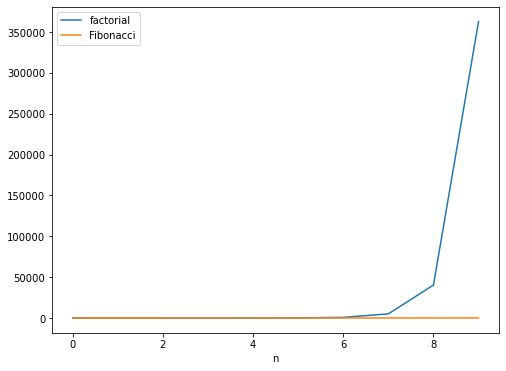

In [4]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(facts,label="factorial")
plt.plot(fibs,label="Fibonacci")
plt.xlabel("n")
plt.legend()
plt.show()

The factorial function grows much faster. In fact, you can't even see the Fibonacci sequence. It's not entirely surprising: a function where we multiply by n each iteration is bound to grow faster than one where we add (roughly) n each iteration.

Let's plot these on a semilog plot so we can see them both a little more clearly:

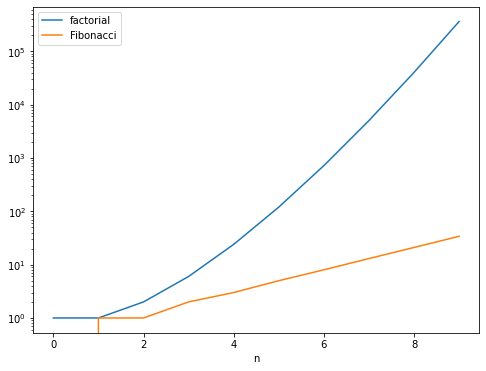

In [7]:
plt.semilogy(facts,label="factorial")
plt.semilogy(fibs,label="Fibonacci")
plt.xlabel("n")
plt.legend()
plt.show()

### Example scatter plot

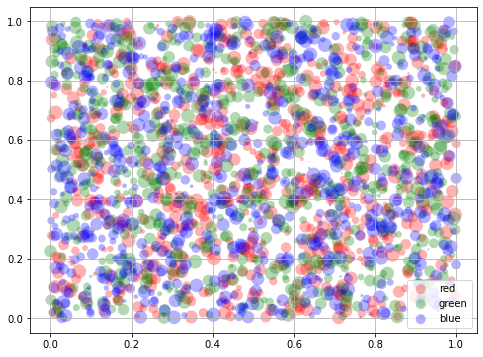

In [8]:
import matplotlib.pyplot as plt
from numpy.random import rand


fig, ax = plt.subplots()
for color in ['red', 'green', 'blue']:
    n = 750
    x, y = rand(2, n)
    scale = 200.0 * rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

### Example boxplots

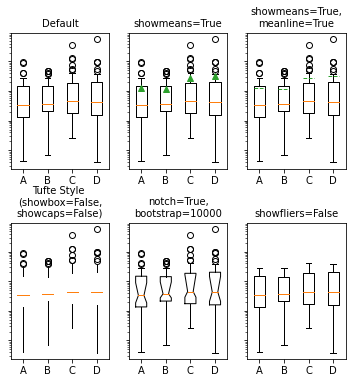

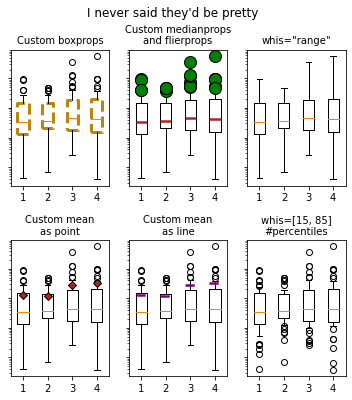

In [10]:
"""
=========================================
Demo of artist customization in box plots
=========================================

This example demonstrates how to use the various kwargs
to fully customize box plots. The first figure demonstrates
how to remove and add individual components (note that the
mean is the only value not shown by default). The second
figure demonstrates how the styles of the artists can
be customized. It also demonstrates how to set the limit
of the whiskers to specific percentiles (lower right axes)

A good general reference on boxplots and their history can be found
here: http://vita.had.co.nz/papers/boxplots.pdf

"""

import numpy as np
import matplotlib.pyplot as plt

# fake data
np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')
fs = 10  # fontsize

# demonstrate how to toggle the display of different elements:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axes[0, 0].boxplot(data, labels=labels)
axes[0, 0].set_title('Default', fontsize=fs)

axes[0, 1].boxplot(data, labels=labels, showmeans=True)
axes[0, 1].set_title('showmeans=True', fontsize=fs)

axes[0, 2].boxplot(data, labels=labels, showmeans=True, meanline=True)
axes[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axes[1, 0].boxplot(data, labels=labels, showbox=False, showcaps=False)
tufte_title = 'Tufte Style \n(showbox=False,\nshowcaps=False)'
axes[1, 0].set_title(tufte_title, fontsize=fs)

axes[1, 1].boxplot(data, labels=labels, notch=True, bootstrap=10000)
axes[1, 1].set_title('notch=True,\nbootstrap=10000', fontsize=fs)

axes[1, 2].boxplot(data, labels=labels, showfliers=False)
axes[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()


# demonstrate how to customize the display different elements:
boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axes[0, 0].boxplot(data, boxprops=boxprops)
axes[0, 0].set_title('Custom boxprops', fontsize=fs)

axes[0, 1].boxplot(data, flierprops=flierprops, medianprops=medianprops)
axes[0, 1].set_title('Custom medianprops\nand flierprops', fontsize=fs)

axes[0, 2].boxplot(data, whis=[0,100])
axes[0, 2].set_title('whis="range"', fontsize=fs)

axes[1, 0].boxplot(data, meanprops=meanpointprops, meanline=False,
                   showmeans=True)
axes[1, 0].set_title('Custom mean\nas point', fontsize=fs)

axes[1, 1].boxplot(data, meanprops=meanlineprops, meanline=True,
                   showmeans=True)
axes[1, 1].set_title('Custom mean\nas line', fontsize=fs)

axes[1, 2].boxplot(data, whis=[15, 85])
axes[1, 2].set_title('whis=[15, 85]\n#percentiles', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.suptitle("I never said they'd be pretty")
fig.subplots_adjust(hspace=0.4)
plt.show()

There are many more things you can do with Matplotlib. We'll be looking at some of them in the sections to come. In the meantime, if you want an idea of the different things you can do, look at the Matplotlib [Gallery](http://matplotlib.org/gallery.html).

To learn how to use Matplotlib we will use an adapted version of Rob Johansson's IPython notebook [Introduction to Matplotlib](http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb). I have removed some historical parts and fix some issues.

Link to [Course introduction to Matplotlib](a1-matplotlib.ipynb)